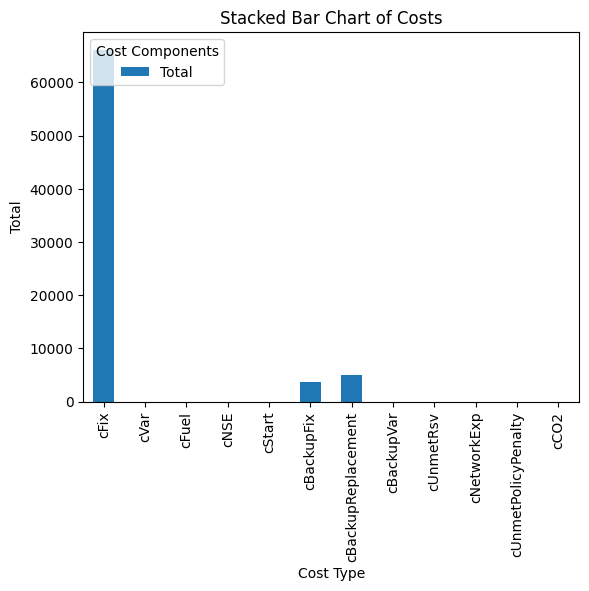

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df_costs = pd.read_csv("C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/costs.csv")

# Drop the first row ("Costs") which contains the labels
df_costs = df_costs.iloc[1:].loc[:, ['Costs', 'Total']]  # Assuming 'Costs' and 'Total' are your column names

# Set the 'Costs' column as the index
df_costs.set_index('Costs', inplace=True)

# Plot the stacked bar chart
df_costs.plot(kind='bar', stacked=True)

# Customize the chart (similar to Julia code)
plt.title('Stacked Bar Chart of Costs')
plt.xlabel('Cost Type')
plt.ylabel('Total')
plt.legend(title='Cost Components', loc='upper left') 

# Display the chart
plt.show()

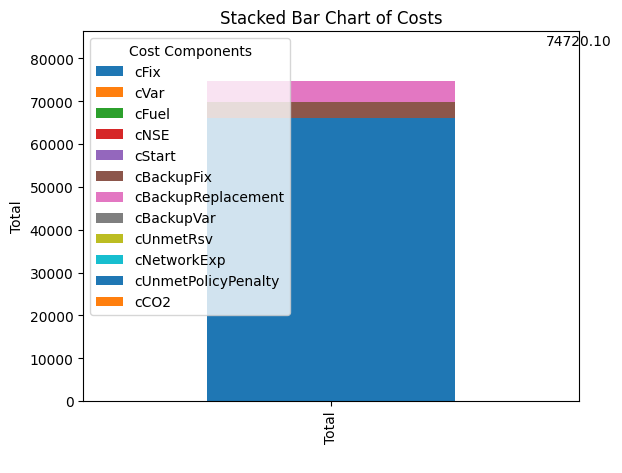

In [2]:
# Transpose the DataFrame to have cost types as columns
df_costs_transposed = df_costs.T

# Plot the stacked bar chart
ax = df_costs_transposed.plot(kind='bar', stacked=True)

# Calculate the total sum of all bars
total_sum = df_costs['Total'].sum()

# Get the y-axis limits
ymin, ymax = ax.get_ylim()

# Add the total sum label above the diagram
ax.text(0.5, ymax * 1.05, f'{total_sum:.2f}', ha='center', va='bottom')  # Adjust 1.05 for vertical spacing

# Customize the chart
plt.title('Stacked Bar Chart of Costs')
plt.xlabel(' ')
plt.ylabel('Total')
plt.legend(title='Cost Components', loc='upper left')

# Adjust the y-axis limits to accommodate the label
ax.set_ylim(ymin, ymax * 1.1)  # Adjust 1.1 to provide enough space for the label

# Display the chart
plt.show()

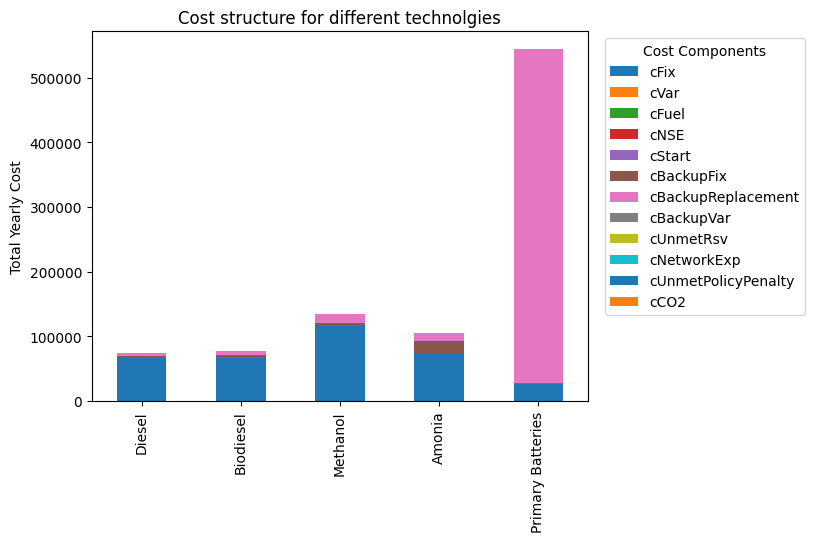

Costs      cFix      cVar       cFuel  cNSE    cStart    cBackupFix  \
Total   66163.0  0.696667    1.651933   0.0  0.407667   3598.267124   
Total   66863.0  0.766333    2.048396   0.0  0.460507   3958.093836   
Total  118079.0  0.696667    2.315337   0.0  0.000000   2605.987332   
Total   74443.0  0.836000    2.099617   0.0  0.467333  17991.335619   
Total   26721.0  0.696667  718.016289   0.0  0.000000      0.000000   

Costs  cBackupReplacement  cBackupVar  cUnmetRsv  cNetworkExp  \
Total         4954.398545    1.675644        0.0          0.0   
Total         7260.761280    2.077799        0.0          0.0   
Total        13568.017859    2.348571        0.0          0.0   
Total        12303.889051    2.129756        0.0          0.0   
Total       515972.001846  728.322743        0.0          0.0   

Costs  cUnmetPolicyPenalty  cCO2  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/costs.csv", 
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_5/costs.csv"
]

# Read and preprocess all CSV files
df_costs_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df = df.iloc[1:].loc[:, ['Costs', 'Total']]
    df.set_index('Costs', inplace=True)
    df_costs_list.append(df)

# Combine DataFrames and transpose for plotting
combined_df = pd.concat(df_costs_list, axis=1)
combined_df_transposed = combined_df.T

# Plot the stacked bar chart
ax = combined_df_transposed.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Cost structure for different technolgies')
plt.ylabel('Total Yearly Cost')
plt.xticks(range(len(file_paths)), ['Diesel', 'Biodiesel', 'Methanol', 'Amonia', 'Primary Batteries'])  # Set x-axis labels

# Adjust legend position to avoid overlap
plt.legend(title='Cost Components', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the chart
plt.show()
print(combined_df_transposed)

In [4]:
# Calculate the total cost for each row and add it as a new column
combined_df_transposed['Total Cost'] = combined_df_transposed.sum(axis=1)

# Create a new dataframe to store the percentages
percentage_df = combined_df_transposed.copy()

# Calculate percentages for each cost component
for column in combined_df_transposed.columns:
    if column != 'Total Cost':  # Exclude the 'Total Cost' column itself
        percentage_df[column] = (combined_df_transposed[column] / combined_df_transposed['Total Cost']) * 100

# Display the first few rows of the percentage dataframe
print(percentage_df.head().to_markdown(numalign="left", stralign="left"))

|       | cFix    | cVar        | cFuel      | cNSE   | cStart      | cBackupFix   | cBackupReplacement   | cBackupVar   | cUnmetRsv   | cNetworkExp   | cUnmetPolicyPenalty   | cCO2   | Total Cost   |
|:------|:--------|:------------|:-----------|:-------|:------------|:-------------|:---------------------|:-------------|:------------|:--------------|:----------------------|:-------|:-------------|
| Total | 88.5478 | 0.000932369 | 0.00221083 | 0      | 0.000545592 | 4.81566      | 6.63061              | 0.00224256   | 0           | 0             | 0                     | 0      | 74720.1      |
| Total | 85.6261 | 0.000981381 | 0.00262322 | 0      | 0.000589734 | 5.06881      | 9.29827              | 0.00266087   | 0           | 0             | 0                     | 0      | 78087.2      |
| Total | 87.9491 | 0.0005189   | 0.00172454 | 0      | 0           | 1.94102      | 10.1059              | 0.00174929   | 0           | 0             | 0                     | 0      | 134258    

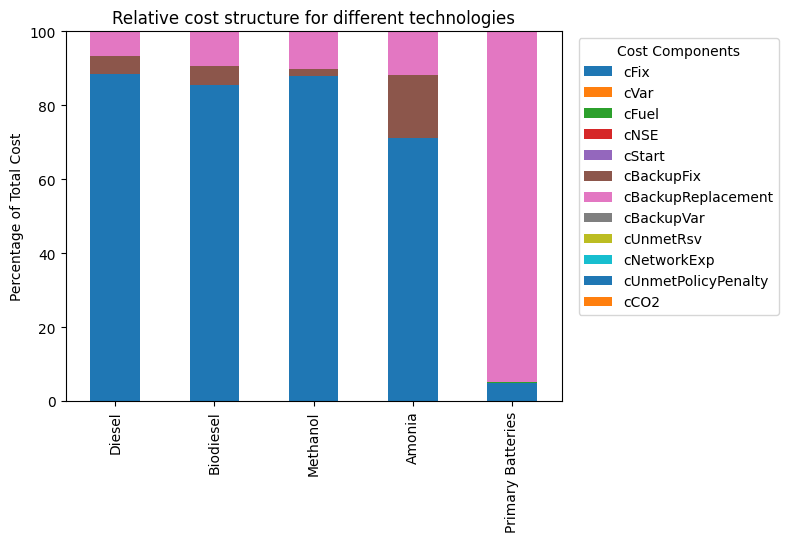

Costs      cFix      cVar       cFuel  cNSE    cStart    cBackupFix  \
Total   66163.0  0.696667    1.651933   0.0  0.407667   3598.267124   
Total   66863.0  0.766333    2.048396   0.0  0.460507   3958.093836   
Total  118079.0  0.696667    2.315337   0.0  0.000000   2605.987332   
Total   74443.0  0.836000    2.099617   0.0  0.467333  17991.335619   
Total   26721.0  0.696667  718.016289   0.0  0.000000      0.000000   

Costs  cBackupReplacement  cBackupVar  cUnmetRsv  cNetworkExp  \
Total         4954.398545    1.675644        0.0          0.0   
Total         7260.761280    2.077799        0.0          0.0   
Total        13568.017859    2.348571        0.0          0.0   
Total        12303.889051    2.129756        0.0          0.0   
Total       515972.001846  728.322743        0.0          0.0   

Costs  cUnmetPolicyPenalty  cCO2  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total                  0.0   0.0  
Total  

In [5]:
# Plot the stacked bar chart using the percentage dataframe
ax = percentage_df.drop(columns=['Total Cost']).plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Relative cost structure for different technologies')
plt.ylabel('Percentage of Total Cost')
plt.xticks(range(len(file_paths)), ['Diesel', 'Biodiesel', 'Methanol', 'Amonia', 'Primary Batteries'])
plt.ylim(0, 100)

# Adjust legend position
plt.legend(title='Cost Components', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the chart
plt.show()

# Print the combined dataframe without the 'Total Cost' column
print(combined_df_transposed.drop(columns=['Total Cost']))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/costs.csv" 
    #"C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_5/costs.csv"
]

# Read and preprocess all CSV files
df_costs_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df = df.iloc[1:]  # Skip the first row (assuming it's a header)

    # Calculate the total cost for each row by summing all numeric columns
    df['Total'] = df.sum(axis=1)

    # Set 'Costs' as the index
    df.set_index('Costs', inplace=True)
    print(df)

    # Calculate percentages of the total cost for each cost component
    total_cost = df.loc['Total', 'Total']
    df = df / total_cost * 100 

    df_costs_list.append(df)

# Combine DataFrames and transpose for plotting
combined_df = pd.concat(df_costs_list, axis=1)
combined_df_transposed = combined_df.T

# Plot the stacked bar chart
ax = combined_df_transposed.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Stacked Bar Chart of Costs as Percentages')
plt.xlabel('File')
plt.ylabel('Percentage of Total Cost')
plt.xticks(range(len(file_paths)), ['Diesel', 'Biodiesel', 'Methanol', 'Amonia'])
plt.ylim(0, 100)

# Adjust legend position
plt.legend(title='Cost Components', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the chart
plt.show()

TypeError: can only concatenate str (not "float") to str

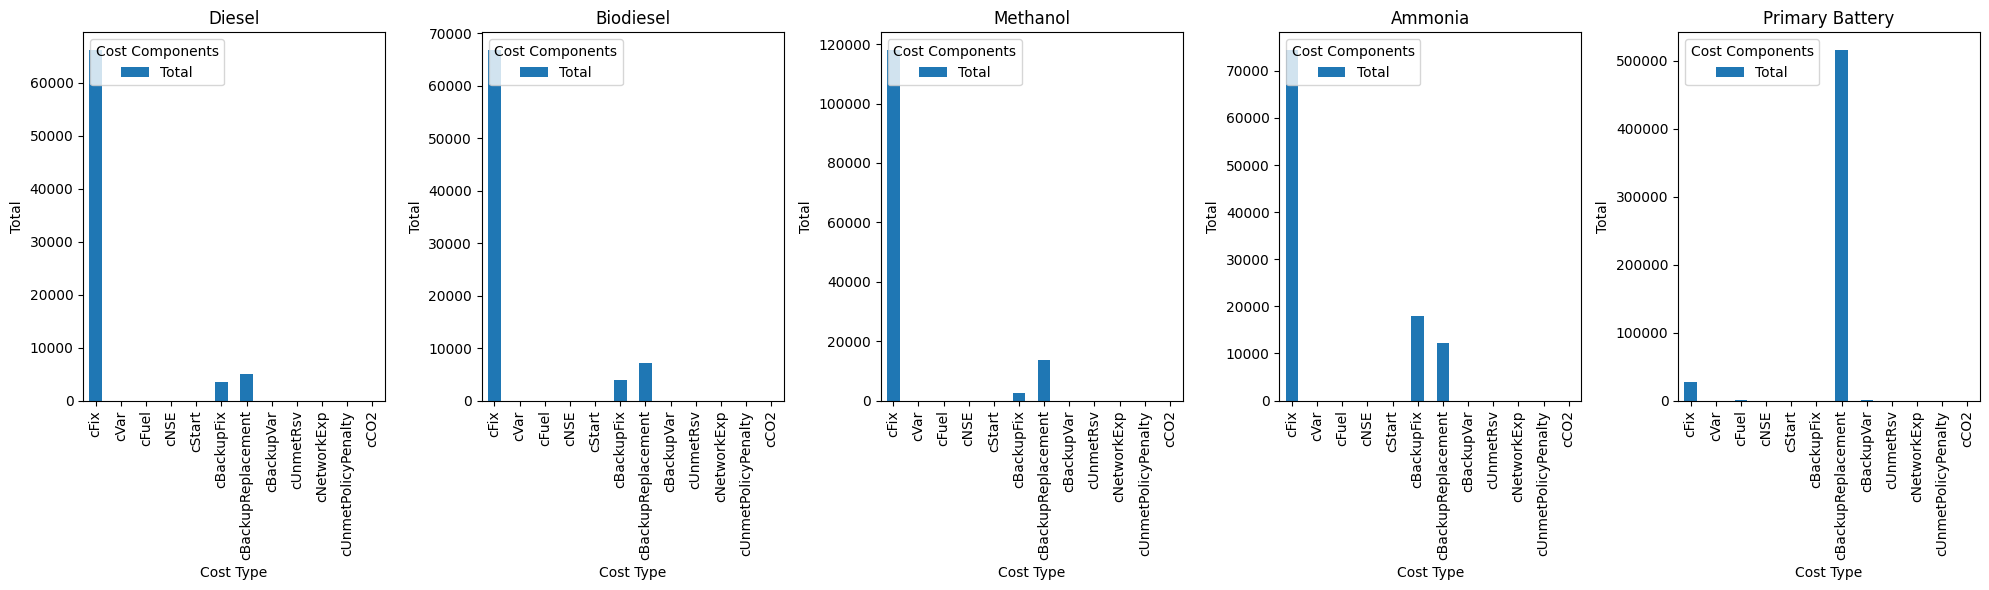

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/costs.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_5/costs.csv"
     

]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))  # Adjust figsize as needed
# Titles for the subplots
subplot_titles = ['Diesel', 'Biodiesel', 'Methanol', 'Ammonia', 'Primary Battery']

# Iterate through files and plot
for i, file_path in enumerate(file_paths):
    df_costs = pd.read_csv(file_path)
    df_costs = df_costs.iloc[1:].loc[:, ['Costs', 'Total']]
    df_costs.set_index('Costs', inplace=True)

    # Plot on the corresponding subplot
    df_costs.plot(kind='bar', stacked=True, ax=axes[i]) 

    # Customize the subplot
    axes[i].set_title(subplot_titles[i])  # Set individual titles
    axes[i].set_xlabel('Cost Type')
    axes[i].set_ylabel('Total')
    axes[i].legend(title='Cost Components', loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_5/emissions_plant.csv"
]

# Data to store extracted information
data = []

# Loop through each file
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Get the 'AnnualSum' row as a Series
    annual_sum_row = df.loc[df.index == 'AnnualSum'].squeeze()

    # Find the column with a non-zero value
    non_zero_column = annual_sum_row[annual_sum_row != 0]

    if not non_zero_column.empty:
        # Extract the column name and value, with a check
        column_name = non_zero_column.index[0]
        if not isinstance(column_name, str):
            print(f"Warning: Unexpected column name type in {file_path}: {column_name}")
            continue  # Skip this file if the column name is not a string

        value = non_zero_column.values[0]

        # Append to data list
        data.append({'File': file_path, 'Technology': column_name, 'AnnualSum': value})
    else:
        print(f"No non-zero values found in AnnualSum row for {file_path}")

# Create a DataFrame from the extracted data
if data:  # Check if any data was extracted
    result_df = pd.DataFrame(data)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(result_df['File'], result_df['AnnualSum'])
    plt.xlabel('File')
    plt.ylabel('AnnualSum')
    plt.title('AnnualSum by Technology for Each File')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No data to plot. Check if your CSV files have non-zero values in the AnnualSum row.")

No non-zero values found in AnnualSum row for C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/emissions_plant.csv
No non-zero values found in AnnualSum row for C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/emissions_plant.csv
No non-zero values found in AnnualSum row for C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/emissions_plant.csv
No non-zero values found in AnnualSum row for C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/emissions_plant.csv
No non-zer

In [36]:
import pandas as pd

# File paths
file_paths = [
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_1/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_2/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_3/emissions_plant.csv",
    "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/GenX_Jonas/backup_systems/01_one_zone_TDR_15min_add_storage_test_v1/results_5/emissions_plant.csv"
]

# List to store DataFrames from each file
extracted_rows = []

# Loop through each file
for file_path in file_paths:
    try: 
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Get the second row as a Series
        second_row = df.iloc[1]

        # Find the columns with non-zero values
        non_zero_columns = second_row[second_row != 0]

        if not non_zero_columns.empty:
            # Select the second row for the first non-zero column 
            extracted_rows.append(df.loc[df.index == non_zero_columns.index[0]].iloc[0]) 
        else:
            print(f"No non-zero values found in the second row for {file_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Create a DataFrame from the extracted data
if extracted_rows:
    result_df = pd.DataFrame(extracted_rows)
    print(result_df.head().to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("No data to create the DataFrame.")

IndexError: single positional indexer is out-of-bounds

In [31]:
non_zero_columns

Resource                  AnnualSum
MA_Primary_Al_Air_BESS     0.957345
Total                      0.957345
Name: 1, dtype: object

In [40]:
type(non_zero_columns)

pandas.core.series.Series